In [68]:
import pathlib

import numpy as np
from matplotlib import pyplot as plt
from tqdm import notebook
import os

import pandas as pd
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [69]:
%load_ext autoreload
%autoreload 2

from dataset import OCRDataset
from utils import draw_bbox, load_json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
archive_name = pathlib.Path("data", "raw", "contest02_data_generated.zip")

In [162]:
transforms = A.Compose(
    [
        A.ColorJitter(),
        A.ISONoise(),
        A.MotionBlur(),
        A.RandomShadow(),
        A.RandomSunFlare(src_radius=20),
        A.Perspective(fit_output=True), 
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ]
)

In [163]:
dataset = OCRDataset(archive_name, aug_transforms=transforms)

In [164]:
# dataset[0]["img"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


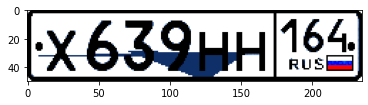

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


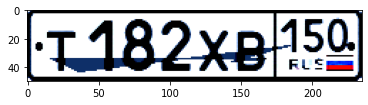

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


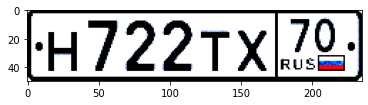

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


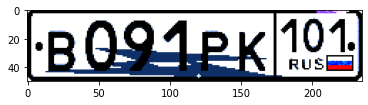

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


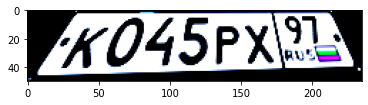

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


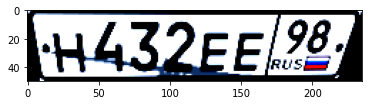

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


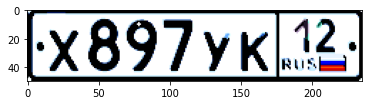

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


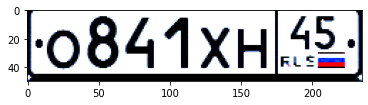

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


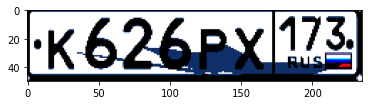

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


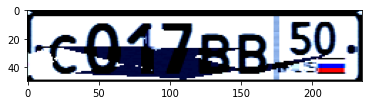

In [180]:
for index in range(10):
    plt.imshow(dataset[index]["img"])
    plt.show()